# Movie Genres Data Analysis Project

Focus on genre's and knowing everything about it.

**Research Questions (Q):**
1. Which genres are the most common (numer of movies made)?
2. Which genres have high avg. budget and revenue?
2.5 Which genres have high avg. profit?
3. Which genres have high avg. popularity?
4. Which genres have highest number of movies with an voting avg. >= 8?

**Research Hypothesis (H):**
1. The best movie according to vote avg. return high profit and revenue
2. The best movies according to popularity return high profit and revenue
3. Highly budget movies return high profit
4. Highly budgeted movies have a high popularity
5. Look at Profit per Genre per Year

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
movies = pd.read_csv(r'C:\Users\Nicola\Documents\Learning\Pandas_for_Data_Analysis\Real-World Projects\imdb_movies.csv')
movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
#1_check for duplicates
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [7]:
movies.drop_duplicates(inplace = True)

In [8]:
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [10]:
#2_genre reshaping
#checking info: id = 10866, genres = 10843. difference = 23 > Null values > drop the NaN

movies.dropna(subset = ['genres'], inplace = True)

In [11]:
movies.info() #10842 vs 10842

<class 'pandas.core.frame.DataFrame'>
Index: 10842 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10842 non-null  int64  
 1   imdb_id               10834 non-null  object 
 2   popularity            10842 non-null  float64
 3   budget                10842 non-null  int64  
 4   revenue               10842 non-null  int64  
 5   original_title        10842 non-null  object 
 6   cast                  10767 non-null  object 
 7   homepage              2931 non-null   object 
 8   director              10800 non-null  object 
 9   tagline               8036 non-null   object 
 10  keywords              9367 non-null   object 
 11  overview              10839 non-null  object 
 12  runtime               10842 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9826 non-null   object 
 15  release_date          10

In [12]:
movies['profit'] = movies['revenue'] - movies['budget']

In [14]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


In [16]:
#select the usefull columns for us
movies_genre = movies[['popularity','budget','revenue','original_title','runtime','genres','release_date','vote_count','vote_average','profit']]
movies_genre

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,1316249360
...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,95,Documentary,6/15/66,11,7.4,0
10862,0.065543,0,0,Grand Prix,176,Action|Adventure|Drama,12/21/66,20,5.7,0
10863,0.065141,0,0,Beregis Avtomobilya,94,Mystery|Comedy,1/1/66,11,6.5,0
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,Action|Comedy,11/2/66,22,5.4,0


In [19]:
from pandas import Series, DataFrame

movies_genre['genres'].str.split('|').apply(Series,1).stack()
#multi-level index. You apply all this for series on the y axis. Stack reshape the df in this multi-level index

0      0             Action
       1          Adventure
       2    Science Fiction
       3           Thriller
1      0             Action
                 ...       
10863  0            Mystery
       1             Comedy
10864  0             Action
       1             Comedy
10865  0             Horror
Length: 26955, dtype: object

In [20]:
movies_genre['genres'].str.split('|').apply(Series,1)
#without stack it looks like this

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,NaN
1,Action,Adventure,Science Fiction,Thriller,NaN
2,Adventure,Science Fiction,Thriller,NaN,NaN
3,Action,Adventure,Science Fiction,Fantasy,NaN
4,Action,Crime,Thriller,NaN,NaN
...,...,...,...,...,...
10861,Documentary,NaN,NaN,NaN,NaN
10862,Action,Adventure,Drama,NaN,NaN
10863,Mystery,Comedy,NaN,NaN,NaN
10864,Action,Comedy,NaN,NaN,NaN


In [22]:
split = movies_genre['genres'].str.split('|').apply(Series,1).stack()
split.index = split.index.droplevel(-1)
split
#we've removed the 1,2,3 index 

0                 Action
0              Adventure
0        Science Fiction
0               Thriller
1                 Action
              ...       
10863            Mystery
10863             Comedy
10864             Action
10864             Comedy
10865             Horror
Length: 26955, dtype: object

In [23]:
split.name = 'genres_split'
#renaming the above series
del movies_genre['genres']
#deleting the original genres colum
movies_genre = movies_genre.join(split)
#joining the new column with the df

In [24]:
movies_genre
#we split the genre in multiple rows, and data have been duplicated for each genre's

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,228436354,Action
...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.5,0,Mystery
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.5,0,Comedy
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.4,0,Action
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.4,0,Comedy


**Research Questions:**

1. Which genres are the most common (numer of movies made)?

In [41]:
movies_genre.groupby('genres_split').count().sort_values('original_title', ascending = False)
#this is a series, we need to create a df out of this

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit
genres_split,,,,,,,,,
Drama,4760,4760,4760,4760,4760,4760,4760,4760,4760
Comedy,3793,3793,3793,3793,3793,3793,3793,3793,3793
Thriller,2907,2907,2907,2907,2907,2907,2907,2907,2907
Action,2384,2384,2384,2384,2384,2384,2384,2384,2384
Romance,1712,1712,1712,1712,1712,1712,1712,1712,1712
Horror,1637,1637,1637,1637,1637,1637,1637,1637,1637
Adventure,1471,1471,1471,1471,1471,1471,1471,1471,1471
Crime,1354,1354,1354,1354,1354,1354,1354,1354,1354
Family,1231,1231,1231,1231,1231,1231,1231,1231,1231


In [46]:
genres_count = pd.DataFrame(movies_genre.groupby('genres_split').original_title.nunique()).sort_values('original_title', ascending = True)
genres_count

,original_title
genres_split,
Western,163
TV Movie,167
Foreign,188
War,269
History,331
Music,403
Documentary,520
Animation,697
Mystery,796


<Axes: title={'center': 'Movies Per Genre in %'}, ylabel='original_title'>

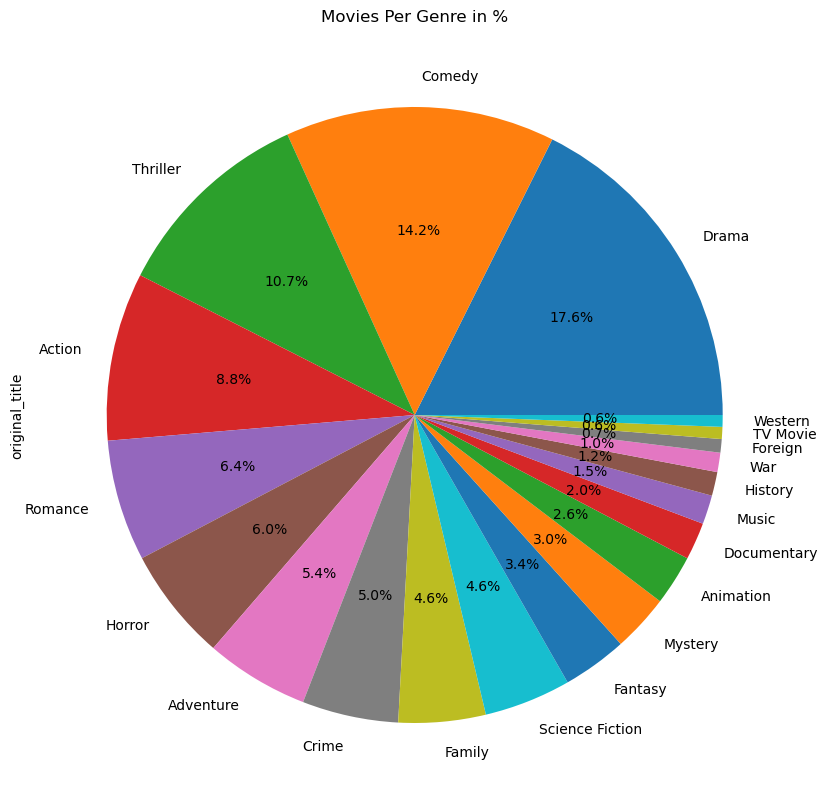

In [44]:
genres_count['original_title'].plot.pie(title = 'Movies Per Genre in %', autopct = '%1.1f%%', figsize = (10,10))

<Axes: title={'center': 'Movies Per Genre'}, ylabel='genres_split'>

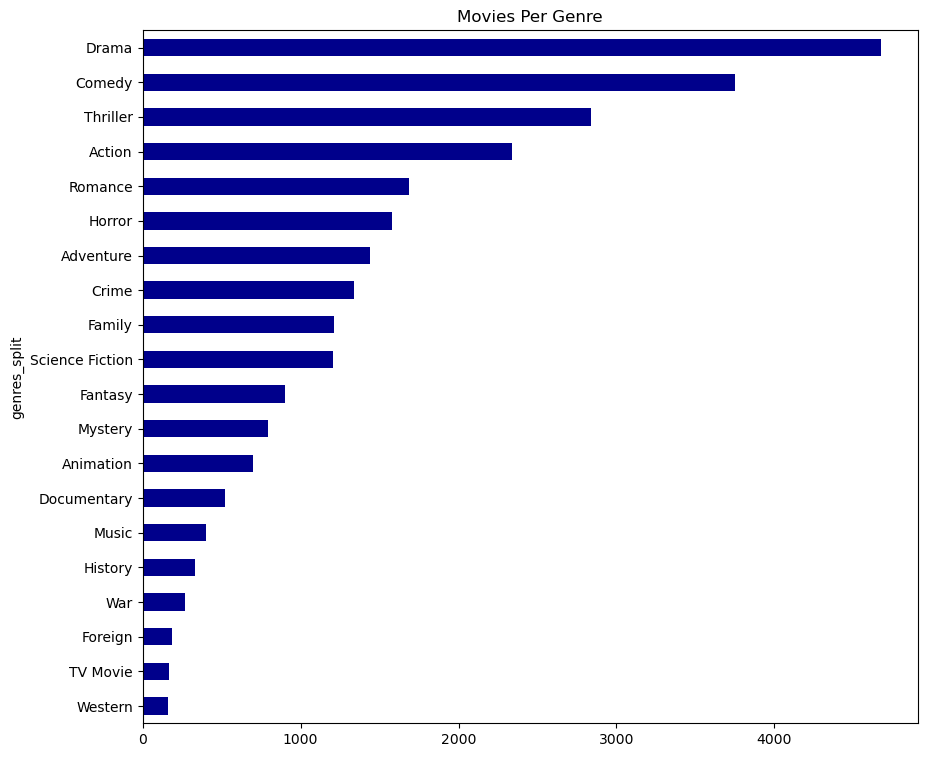

In [49]:
genres_count['original_title'].plot.barh(title = 'Movies Per Genre', color = 'DarkBlue', figsize = (10,9))

2. Which genres have high avg. budget and revenue?

In [57]:
genres_num = movies_genre.set_index('genres_split').drop(columns = ['original_title','release_date'])
genres_num

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
Action,32.985763,150000000,1513528810,124,5562,6.5,1363528810
Adventure,32.985763,150000000,1513528810,124,5562,6.5,1363528810
Science Fiction,32.985763,150000000,1513528810,124,5562,6.5,1363528810
Thriller,32.985763,150000000,1513528810,124,5562,6.5,1363528810
Action,28.419936,150000000,378436354,120,6185,7.1,228436354
...,...,...,...,...,...,...,...
Mystery,0.065141,0,0,94,11,6.5,0
Comedy,0.065141,0,0,94,11,6.5,0
Action,0.064317,0,0,80,22,5.4,0


In [60]:
genres_avg = genres_num.groupby('genres_split').mean()
pd.options.display.float_format = '{:2f}'.format

genres_avg

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
Action,0.926274,27727820.331376,72794732.002517,104.917785,392.993708,5.787752,45066911.671141
Adventure,1.154259,37543694.530931,113137861.069341,106.173351,513.125085,5.940585,75594166.538409
Animation,0.852182,23159781.606581,75256062.223176,68.181688,303.000000,6.403147,52096280.616595
Comedy,0.592607,13297915.618244,37526242.072238,96.745057,176.436330,5.905167,24228326.453994
Crime,0.744930,17663801.124815,42368661.645495,106.917282,278.805022,6.124889,24704860.520679
Documentary,0.181432,577149.148077,2041106.994231,102.651923,35.105769,6.908462,1463957.846154
Drama,0.591495,11880717.773529,29232255.725840,110.478151,182.544538,6.165546,17351537.952311
Family,0.786668,23359337.420796,72433176.373680,89.603574,272.320877,5.997563,49073838.952884
Fantasy,0.992840,32612585.348253,96313657.081878,100.736900,420.741266,5.863537,63701071.733624


In [70]:
genres_avg.sort_values('revenue', ascending = True, inplace = True)

<Axes: title={'center': 'Budget and Revenue by Genre'}, ylabel='genres_split'>

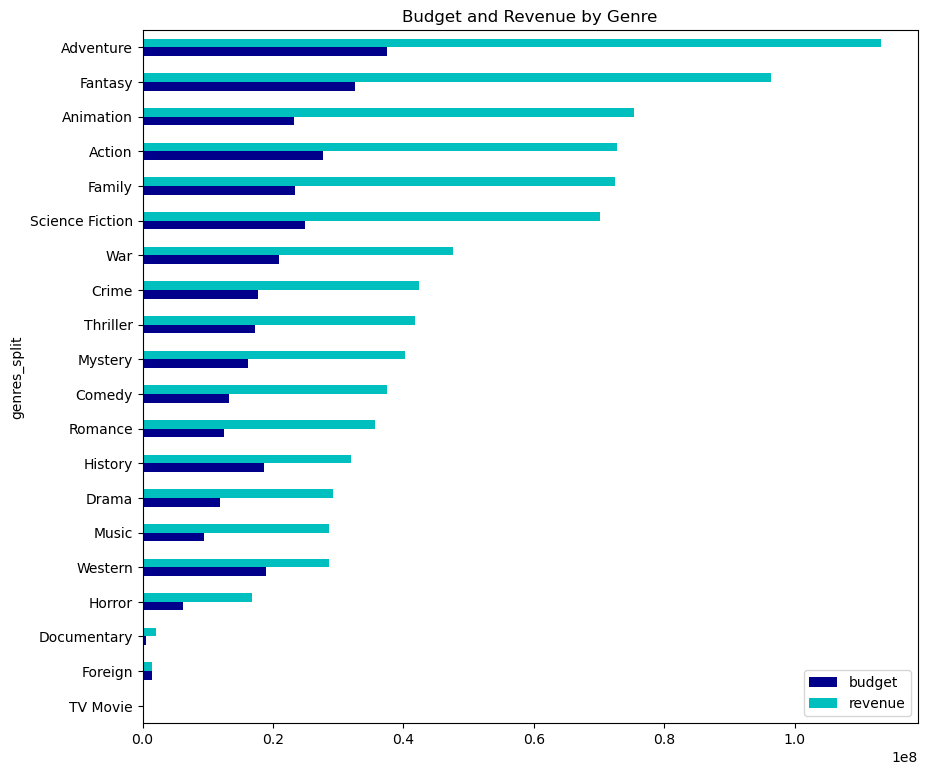

In [71]:
genres_avg[['budget','revenue']].plot.barh(title = 'Budget and Revenue by Genre', color = ('DarkBlue','c'), figsize = (10,9))

2.5 Which genres have high avg. profit?

In [73]:
genres_avg.sort_values('profit', ascending = True, inplace = True)

<Axes: title={'center': 'Profit by Genre'}, ylabel='genres_split'>

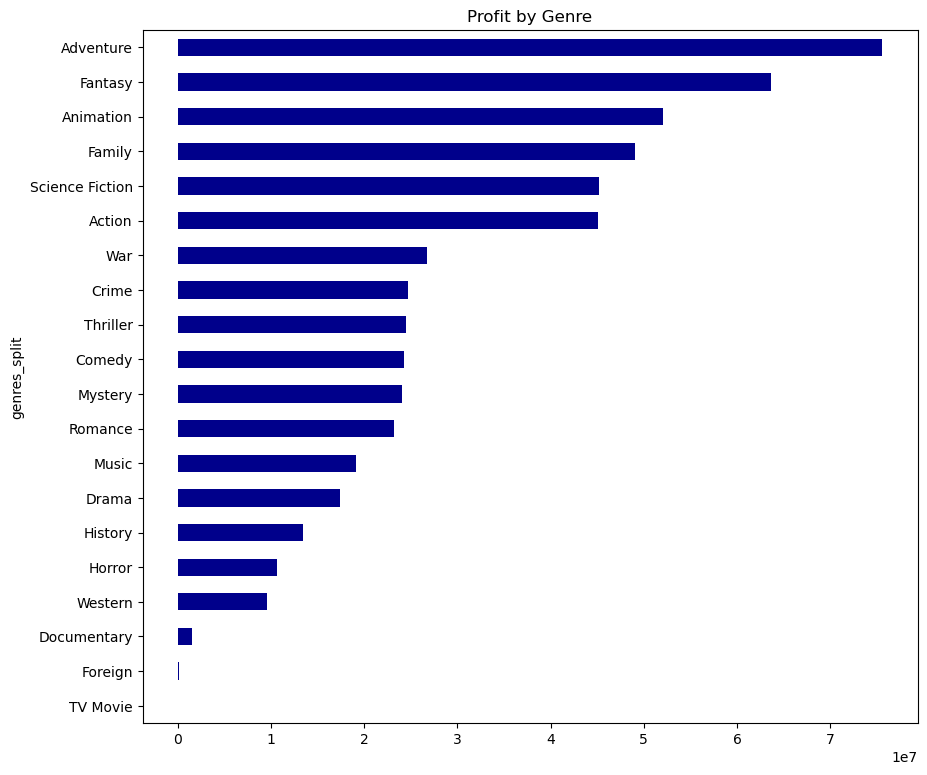

In [74]:
genres_avg['profit'].plot.barh(title = 'Profit by Genre', color = ('DarkBlue'), figsize = (10,9))

3. Which genres have high avg. popularity?

In [75]:
genres_avg.sort_values('popularity', ascending = True, inplace = True)

<Axes: title={'center': 'Popularity by Genre'}, ylabel='genres_split'>

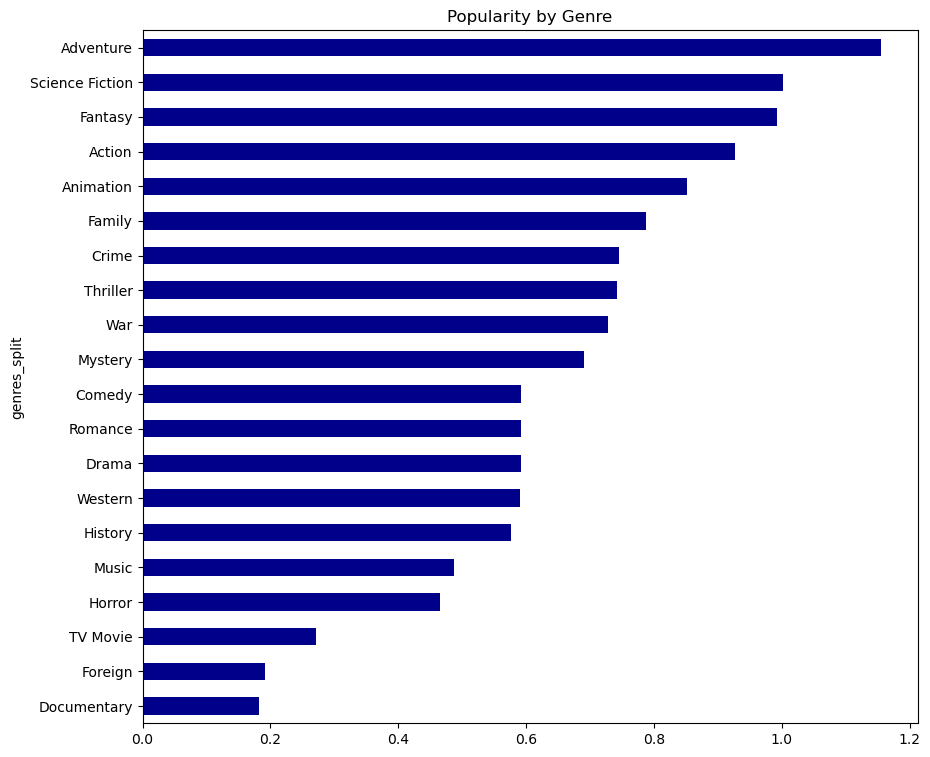

In [76]:
genres_avg['popularity'].plot.barh(title = 'Popularity by Genre', color = ('DarkBlue'), figsize = (10,9))

4. Which genres have highest number of movies with an voting avg. >= 8?

In [78]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.100000,228436354,Action


In [84]:
vote_fifty = movies_genre[(movies_genre['vote_count'] >= 50) & (movies_genre['vote_average'] >= 8)]
vote_zero = movies_genre[movies_genre['vote_average'] >= 8]

In [86]:
genre_vote = pd.DataFrame(vote_fifty.groupby('genres_split').vote_average.nunique()).sort_values('vote_average', ascending = True)
genre_vote

,vote_average
genres_split,
Fantasy,1
Science Fiction,1
Animation,1
Mystery,1
Horror,1
Family,1
Romance,2
Music,2
History,2


<Axes: title={'center': 'Avg. vote by Genre'}, ylabel='genres_split'>

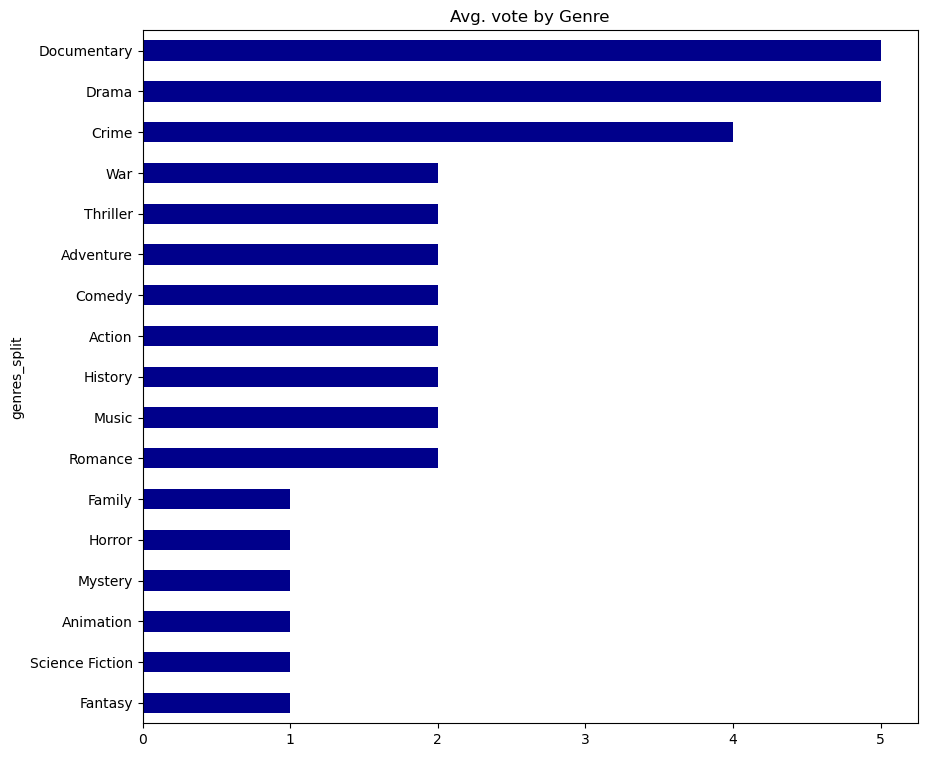

In [87]:
genre_vote['vote_average'].plot.barh(title = 'Avg. vote by Genre', color = ('DarkBlue'), figsize = (10,9))

In [88]:
genre_vote2 = pd.DataFrame(vote_zero.groupby('genres_split').vote_average.nunique()).sort_values('vote_average', ascending = True)
genre_vote2

,vote_average
genres_split,
Family,1
Action,2
Mystery,2
History,2
Fantasy,2
Adventure,2
War,2
Horror,3
Romance,3


<Axes: title={'center': 'Avg. vote by Genre'}, ylabel='genres_split'>

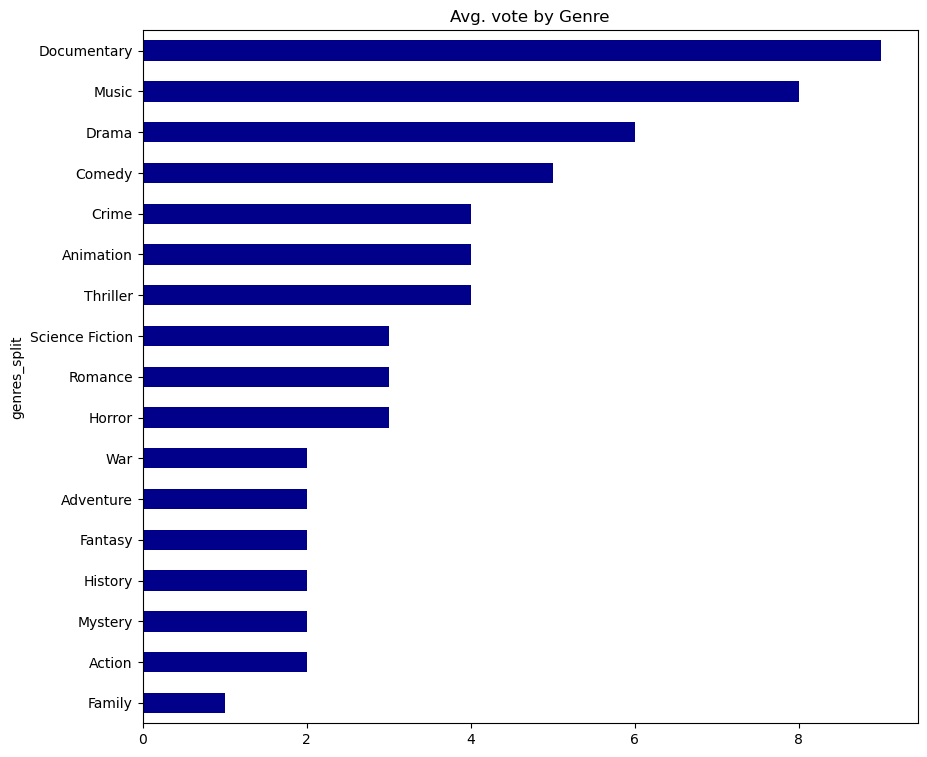

In [89]:
genre_vote2['vote_average'].plot.barh(title = 'Avg. vote by Genre', color = ('DarkBlue'), figsize = (10,9))

**Research Hypothesis:**

1. The best movie according to vote avg. return high profit and revenue

In [4]:
movies.drop_duplicates(inplace = True)
movies['profit'] = movies['revenue'] - movies['budget']
movies_genre = movies[['popularity','budget','revenue','original_title','runtime','genres','release_date','vote_count','vote_average','profit']]

In [6]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,1316249360


In [8]:
movies_counted_my = movies_counted[['popularity','budget','revenue','runtime','vote_count','vote_average','profit']]
movies_counted_my = movies_counted_my[movies_counted_my['vote_count'] >= 50]
movies_counted_my.corr(method = 'spearman')

#movies_counted = movies_genre[movies_genre['vote_count'] >= 50]
#movies_counted.corr(method = 'spearman')

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.485149,0.588739,0.230518,0.768966,0.188670,0.498117
budget,0.485149,1.000000,0.714828,0.360230,0.554586,-0.044440,0.334390
revenue,0.588739,0.714828,1.000000,0.341707,0.682656,0.111731,0.842221
runtime,0.230518,0.360230,0.341707,1.000000,0.263460,0.285514,0.212060
vote_count,0.768966,0.554586,0.682656,0.263460,1.000000,0.284470,0.583602
vote_average,0.188670,-0.044440,0.111731,0.285514,0.284470,1.000000,0.198308
profit,0.498117,0.334390,0.842221,0.212060,0.583602,0.198308,1.000000


<Axes: xlabel='vote_average', ylabel='profit'>

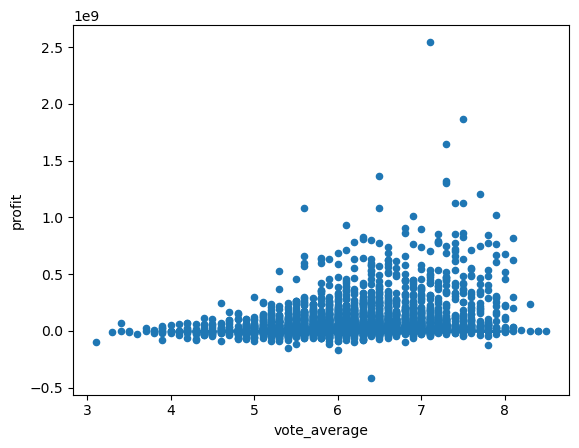

In [9]:
movies_counted_my.plot.scatter(x = 'vote_average', y = 'profit')

<Axes: xlabel='vote_average', ylabel='profit'>

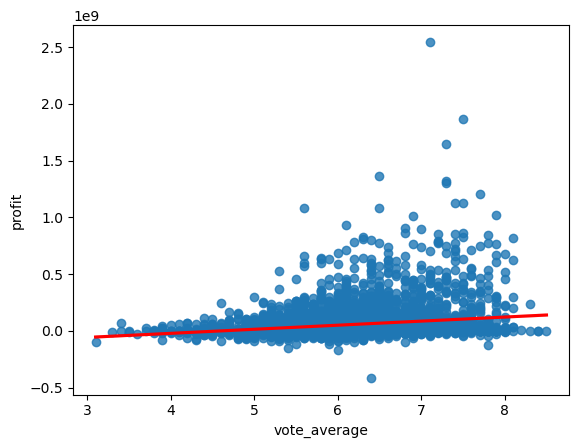

In [11]:
sns.regplot(x = 'vote_average', y='profit', data = movies_counted_my, line_kws = {'color':'red'})

<Axes: xlabel='vote_average', ylabel='revenue'>

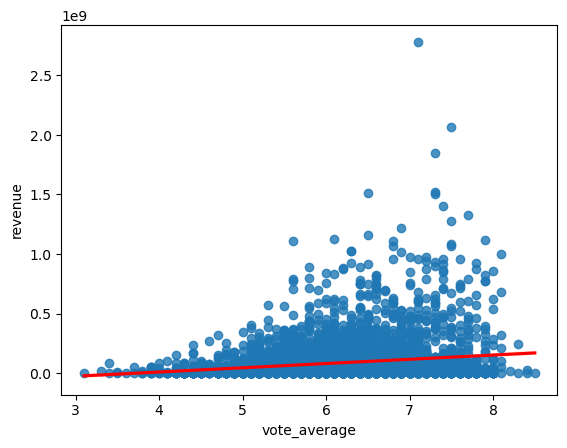

In [12]:
sns.regplot(x = 'vote_average', y='revenue', data = movies_counted_my, line_kws = {'color':'red'})

2. The best movies according to popularity return high profit and revenue

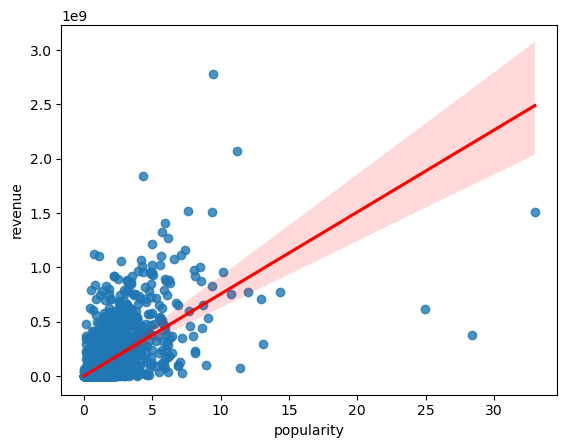

<Figure size 1000x3000 with 0 Axes>

In [17]:
sns.regplot(x = 'popularity', y='revenue', data = movies_counted_my, line_kws = {'color':'red'})
plt.figure(figsize = (10,30))
plt.show()

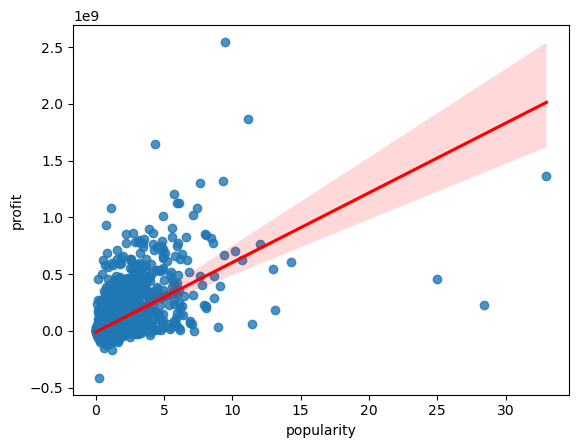

<Figure size 1000x3000 with 0 Axes>

In [18]:
sns.regplot(x = 'popularity', y='profit', data = movies_counted_my, line_kws = {'color':'red'})
plt.figure(figsize = (10,30))
plt.show()

3. Highly budget movies return high profit

In [19]:
movies_counted_my.head()

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,124,5562,6.5,1363528810
1,28.419936,150000000,378436354,120,6185,7.1,228436354
2,13.112507,110000000,295238201,119,2480,6.3,185238201
3,11.173104,200000000,2068178225,136,5292,7.5,1868178225
4,9.335014,190000000,1506249360,137,2947,7.3,1316249360


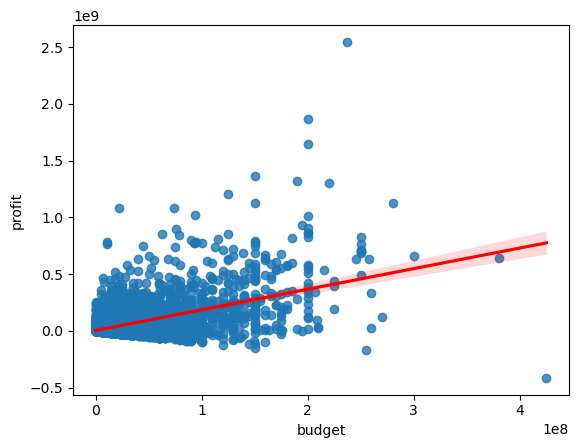

<Figure size 1000x3000 with 0 Axes>

In [21]:
sns.regplot(x = 'budget', y='profit', data = movies_counted_my, line_kws = {'color':'red'})
plt.figure(figsize = (10,30))
plt.show()

4. Highly budgeted movies have a high popularity

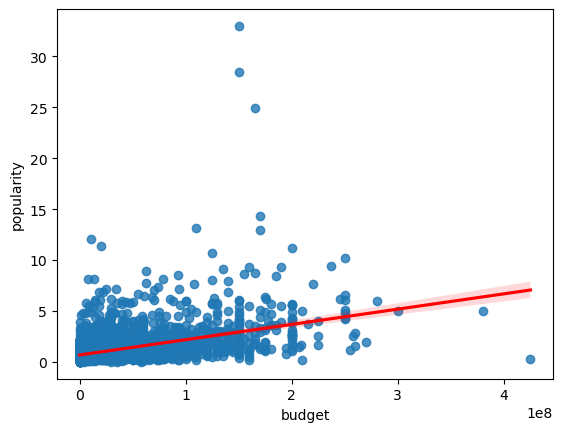

<Figure size 1000x3000 with 0 Axes>

In [22]:
sns.regplot(x = 'budget', y='popularity', data = movies_counted_my, line_kws = {'color':'red'})
plt.figure(figsize = (10,30))
plt.show()

5. Look at Profit per Genre per Year

In [32]:
#select the usefull columns for us
movies_genre_y = movies[['popularity','budget','revenue','original_title','runtime','genres','release_year','vote_count','vote_average','profit']]
movies_genre_y

,popularity,budget,revenue,original_title,runtime,genres,release_year,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,5562,6.5,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015,6185,7.1,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015,2480,6.3,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015,5292,7.5,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015,2947,7.3,1316249360
...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,95,Documentary,1966,11,7.4,0
10862,0.065543,0,0,Grand Prix,176,Action|Adventure|Drama,1966,20,5.7,0
10863,0.065141,0,0,Beregis Avtomobilya,94,Mystery|Comedy,1966,11,6.5,0
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,Action|Comedy,1966,22,5.4,0


In [27]:
from pandas import Series, DataFrame

In [33]:
split = movies_genre_y['genres'].str.split('|').apply(Series,1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres_split'
del movies_genre_y['genres']
movies_genre_y = movies_genre_y.join(split)

In [34]:
movies_genre_y.head()

,popularity,budget,revenue,original_title,runtime,release_year,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.5,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.5,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.5,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.5,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015,6185,7.1,228436354,Action


In [42]:
time_genre = pd.DataFrame(movies_genre_y.groupby(['release_year','genres_split'])['profit'].mean())
time_genre['profit'] = pd.to_numeric(time_genre['profit'], errors = 'coerce')
time_genre

profit
release_year genres_split                 
1960         Action           6.363125e+06
             Adventure        4.310000e+05
             Comedy           5.258750e+06
             Crime            0.000000e+00
             Drama            8.245619e+06
...                                    ...
2015         Science Fiction  8.332130e+07
             TV Movie        -1.500000e+05
             Thriller         3.286911e+07
             War              5.467731e+07
             Western          7.285662e+07

[1049 rows x 1 columns]

In [44]:
final_genre = pd.pivot_table(time_genre, values = 'profit', index = ['genres_split'], columns = ['release_year'])
final_genre

release_year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
genres_split,,,,,,,,,,,,,,,,,,,,,
Action,6.363125e+06,2.457143e+06,1.043750e+07,1.499969e+07,2.428000e+07,1.610450e+07,3.247857e+05,2.173279e+07,8.868479e+06,5.861449e+06,...,3.804862e+07,4.597744e+07,4.764276e+07,5.755551e+07,3.457103e+07,5.196808e+07,7.191026e+07,4.743173e+07,6.994365e+07,9.039905e+07
Adventure,4.310000e+05,3.913000e+07,2.121429e+07,9.428395e+06,2.412340e+07,2.512428e+07,7.915636e+05,4.928187e+07,1.512216e+07,1.665181e+07,...,6.489520e+07,8.391673e+07,5.501653e+07,1.133649e+08,9.812565e+07,1.133432e+08,1.625496e+08,1.006381e+08,1.203733e+08,1.447879e+08
Animation,NaN,2.118800e+08,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-1.050000e+05,1.009217e+08,0.000000e+00,0.000000e+00,...,3.904773e+07,6.714767e+07,5.190724e+07,4.886290e+07,5.845566e+07,6.342010e+07,6.923155e+07,9.371880e+07,6.431346e+07,8.369117e+07
Comedy,5.258750e+06,2.219800e+07,1.599975e+06,7.655919e+05,7.080111e+06,3.264286e+06,-1.495500e+05,1.013509e+07,-1.277778e+06,-1.250000e+05,...,2.494431e+07,3.067485e+07,2.148301e+07,2.474198e+07,2.315481e+07,2.724136e+07,2.563200e+07,2.506846e+07,2.664879e+07,3.370382e+07
Crime,0.000000e+00,1.882841e+07,3.709949e+06,3.695268e+05,1.723307e+06,-2.250000e+04,-2.755600e+05,1.289968e+07,6.762175e+06,3.148296e+07,...,2.155143e+07,1.670005e+07,3.125870e+07,1.101664e+07,1.349041e+07,2.539527e+07,2.952293e+07,2.324859e+07,5.903014e+06,6.128652e+07
Documentary,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,...,6.772940e+06,5.229345e+06,3.212622e+05,-1.603934e+06,1.874178e+05,2.567197e+06,1.102307e+06,3.218802e+05,1.310414e+04,5.310619e+05
Drama,8.245619e+06,4.912698e+06,4.373796e+06,1.587308e+06,3.726106e+06,1.193381e+07,1.014793e+06,1.804510e+07,6.354859e+06,1.031800e+07,...,1.299480e+07,1.395343e+07,1.673638e+07,1.520906e+07,1.351059e+07,1.083098e+07,2.341894e+07,1.334494e+07,1.369710e+07,1.631531e+07
Family,3.333333e+06,4.257600e+07,4.000000e+06,-3.333333e+05,3.781818e+07,5.167143e+07,-3.418286e+05,6.428120e+07,-6.400000e+05,0.000000e+00,...,3.528175e+07,8.047056e+07,4.448303e+07,6.200932e+07,9.899977e+07,6.548344e+07,6.932149e+07,8.932196e+07,5.629518e+07,8.597452e+07
Fantasy,-3.750000e+05,0.000000e+00,-1.260000e+02,-5.000000e+05,2.406818e+07,NaN,0.000000e+00,-3.000000e+06,-2.000000e+06,0.000000e+00,...,5.796766e+07,9.346158e+07,5.144200e+07,9.623582e+07,8.323533e+07,9.448668e+07,1.222456e+08,7.936363e+07,1.129665e+08,8.657695e+07


Text(0.5, 1.0, 'Genres by Profit per Year')

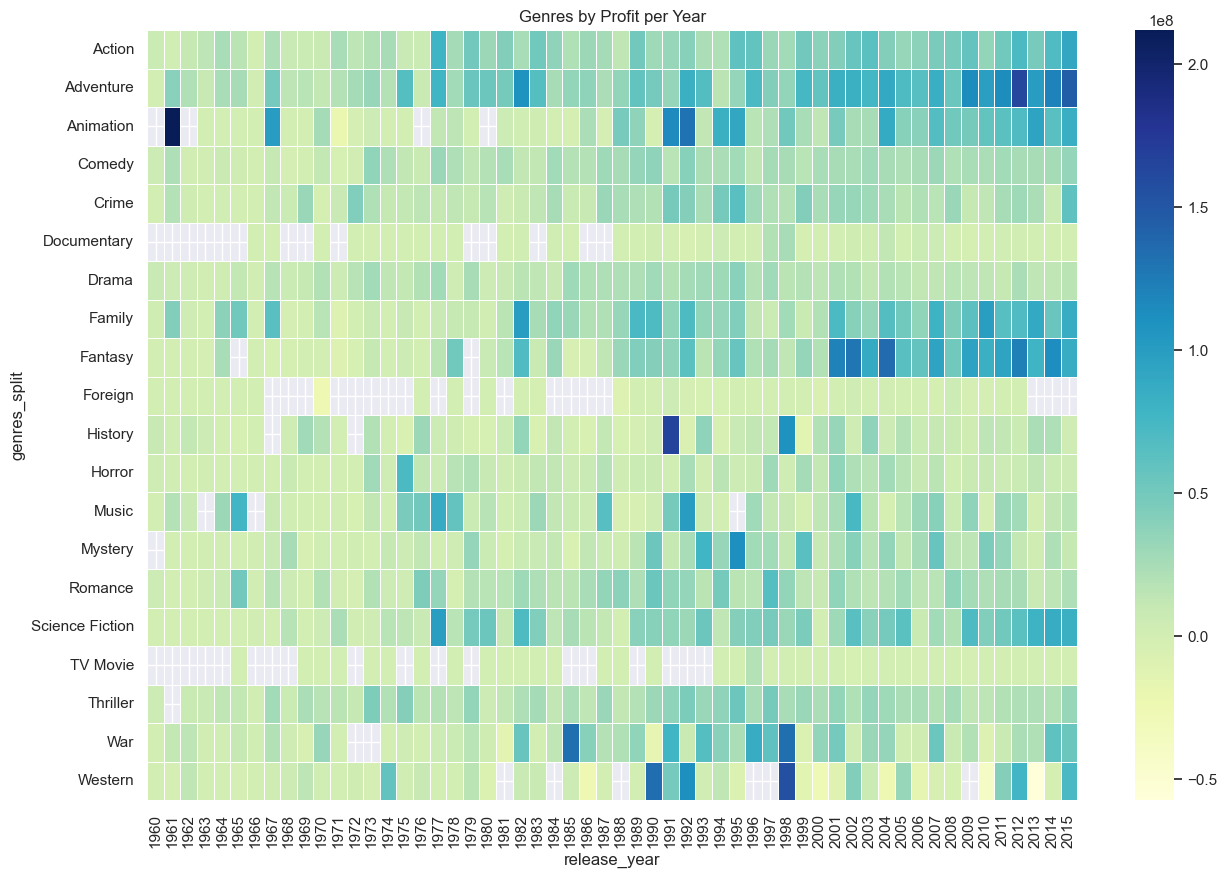

In [48]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(final_genre,cmap = 'YlGnBu', linewidths = .5)
plt.title('Genres by Profit per Year')